In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10


In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output to feed it into fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer: 10 neurons (one for each class)
model.add(layers.Dense(10))

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3594 - loss: 1.7278 - val_accuracy: 0.5620 - val_loss: 1.2264
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.5885 - loss: 1.1687 - val_accuracy: 0.6226 - val_loss: 1.0739
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6499 - loss: 0.9962 - val_accuracy: 0.6583 - val_loss: 0.9910
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6884 - loss: 0.8865 - val_accuracy: 0.6706 - val_loss: 0.9428
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7151 - loss: 0.8111 - val_accuracy: 0.6910 - val_loss: 0.8874
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7398 - loss: 0.7450 - val_accuracy: 0.6929 - val_loss: 0.8852
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7590 - loss: 0.6878 - val_accuracy: 0.6957 - val_loss: 0.8722
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7737 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 3s - 10ms/step - accuracy: 0.7096 - loss: 0.8732

Test accuracy: 0.7095999717712402


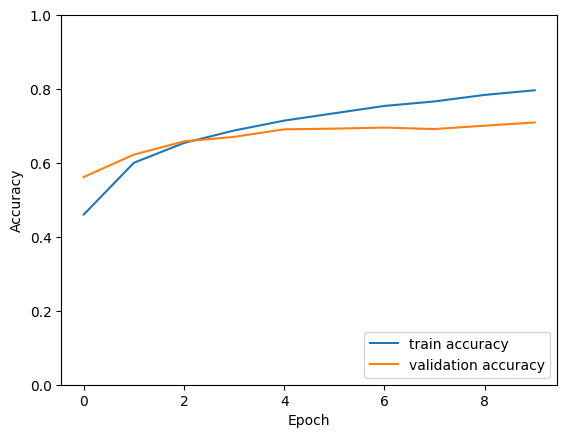

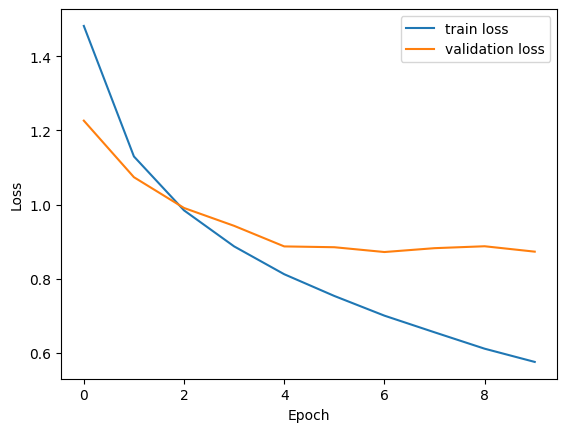

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Get predictions
predictions = model.predict(x_test)

# Convert the logits to probabilities and get the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# Display the first 10 predictions and actual labels
print(f"Predicted: {predicted_classes[:10]}")
print(f"Actual: {y_test[:10].flatten()}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Predicted: [3 8 8 0 4 6 9 6 3 9]
Actual: [3 8 8 0 6 6 1 6 3 1]
